In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from datetime import datetime

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/Users/laasy/Desktop/marketing_campaign1 (1)(1).csv")
df.head()                  #here we load the data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0    9/4/2012       58       635  ...                  7             0   
1    3/8/2014       38        11  ...                  5             0   
2   8/21/2013       26       426  ...                  4             0   
3   2/10/2014       26        11  ...                  6             0   
4   1/19/2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
df.shape

(2240, 29)

In [7]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
# fill the missing values with mean or median value of the column
df = df.fillna(value= df['Income'].mean())
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0    9/4/2012       58       635  ...                  7   
1            1    3/8/2014       38        11  ...                  5   
2            0   8/21/2013       26       426  ...                  4   
3            0   2/10/2014       26        11  ...                  6   
4            0   1/19/2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1   6/13/2013       46       709  ...                  5   
2236         1   6/10/2014       56       406  ...                  7   
2237         0   1/25/2014       91       908  ...                  6   
2238         1   1/24/2014        8       428  ...                  3   
2239         1  10/15/2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

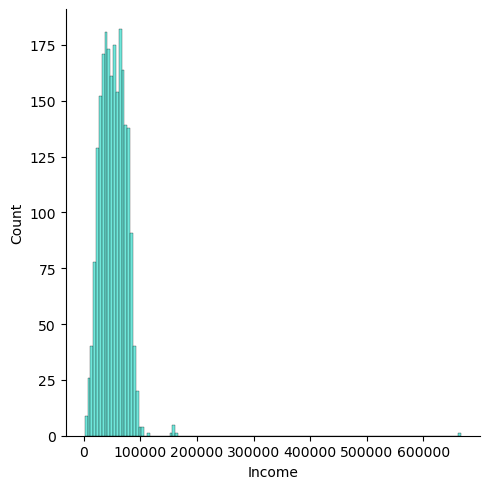

In [10]:
sns.displot(df['Income'],color='turquoise')
plt.show

In [11]:
df[df.duplicated()]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]

In [12]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [13]:
df[['Z_CostContact','Z_CostContact']]

Z_CostContact  Z_CostContact
0                 3              3
1                 3              3
2                 3              3
3                 3              3
4                 3              3
...             ...            ...
2235              3              3
2236              3              3
2237              3              3
2238              3              3
2239              3              3

[2240 rows x 2 columns]

In [14]:
df=df.drop(columns=['Z_CostContact','Z_CostContact'],axis=1)

In [15]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_Revenue', 'Response'],
      dtype='object')

In [16]:
df.isnull().sum().sum()

0

In [17]:
# Calculate Age from Year_Birth
df['Age'] = datetime.now().year - df['Year_Birth']

<function matplotlib.pyplot.show(close=None, block=None)>

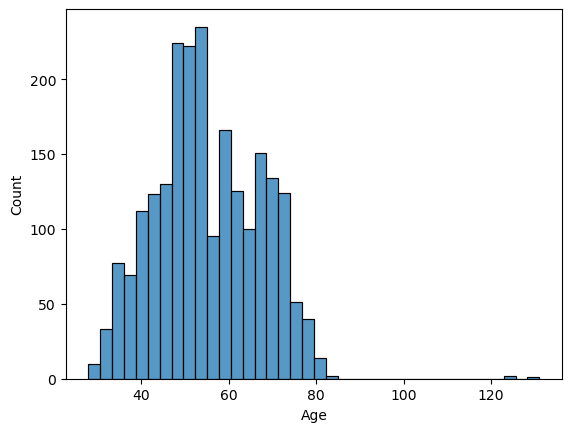

In [18]:
sns.histplot(df['Age'])
plt.show

In [19]:
# Create Family_Size from Kidhome and Teenhome
df['Family_Size'] = df['Kidhome'] + df['Teenhome'] + 1

<function matplotlib.pyplot.show(close=None, block=None)>

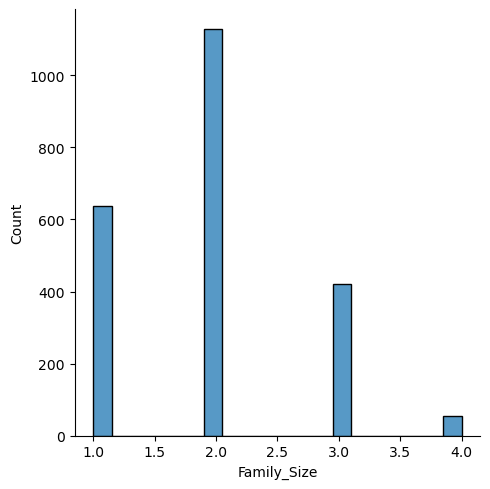

In [20]:
sns.displot(df['Family_Size'])
plt.show

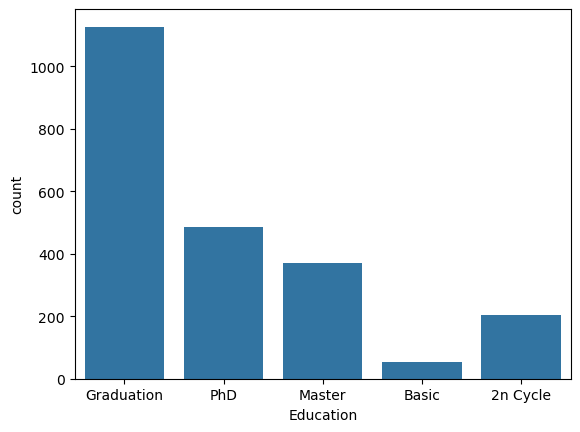

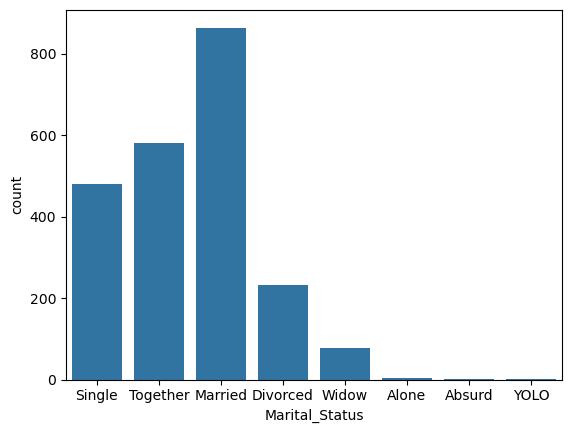

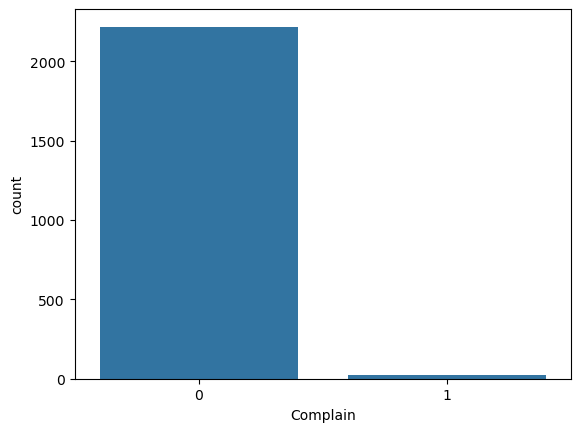

In [21]:
categorical_columns = ['Education','Marital_Status', 'Complain']

for column in categorical_columns:
    sns.countplot(x= column, data =df)
    plt.show()

In [22]:
# Calculate Total_Spent from all product-related columns
df['Total_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

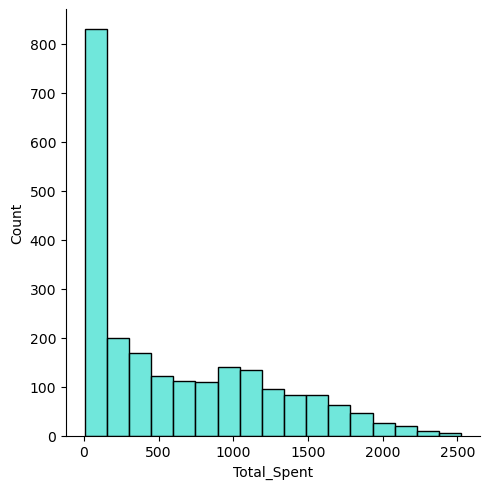

In [23]:
sns.displot(df['Total_Spent'],color='turquoise')
plt.show

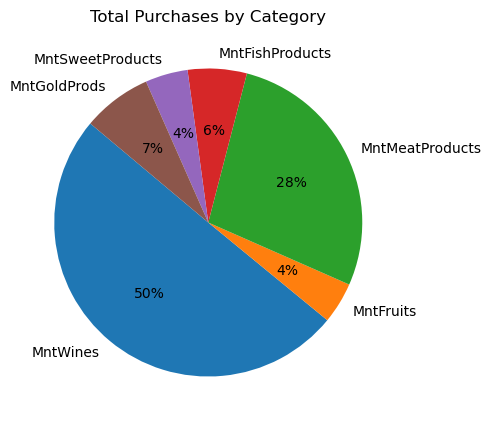

In [24]:
# Pie chart Distribution of Product Category

categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
totals = df[categories].sum()

plt.figure(figsize=(5, 5))
plt.pie(totals, labels=categories, autopct='%1.0f%%', startangle=140)
plt.title('Total Purchases by Category')
plt.show()

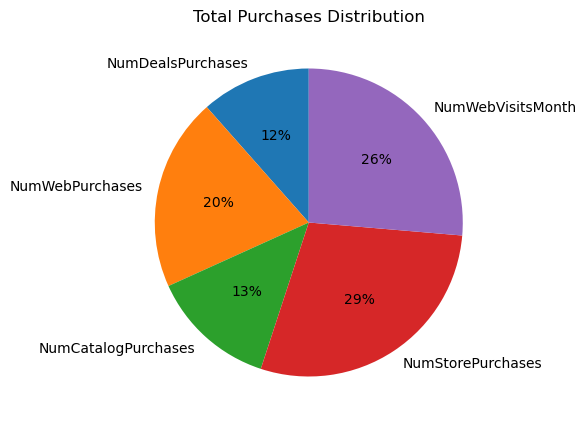

In [25]:
# Comparing different purchases using Pie Chart
total_purchases = {
    'NumDealsPurchases': df['NumDealsPurchases'].sum(),
    'NumWebPurchases': df['NumWebPurchases'].sum(),
    'NumCatalogPurchases': df['NumCatalogPurchases'].sum(),
    'NumStorePurchases': df['NumStorePurchases'].sum(),
    'NumWebVisitsMonth': df['NumWebVisitsMonth'].sum()
}

labels = total_purchases.keys()
sizes = total_purchases.values()

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=90)
plt.title('Total Purchases Distribution')
plt.show()

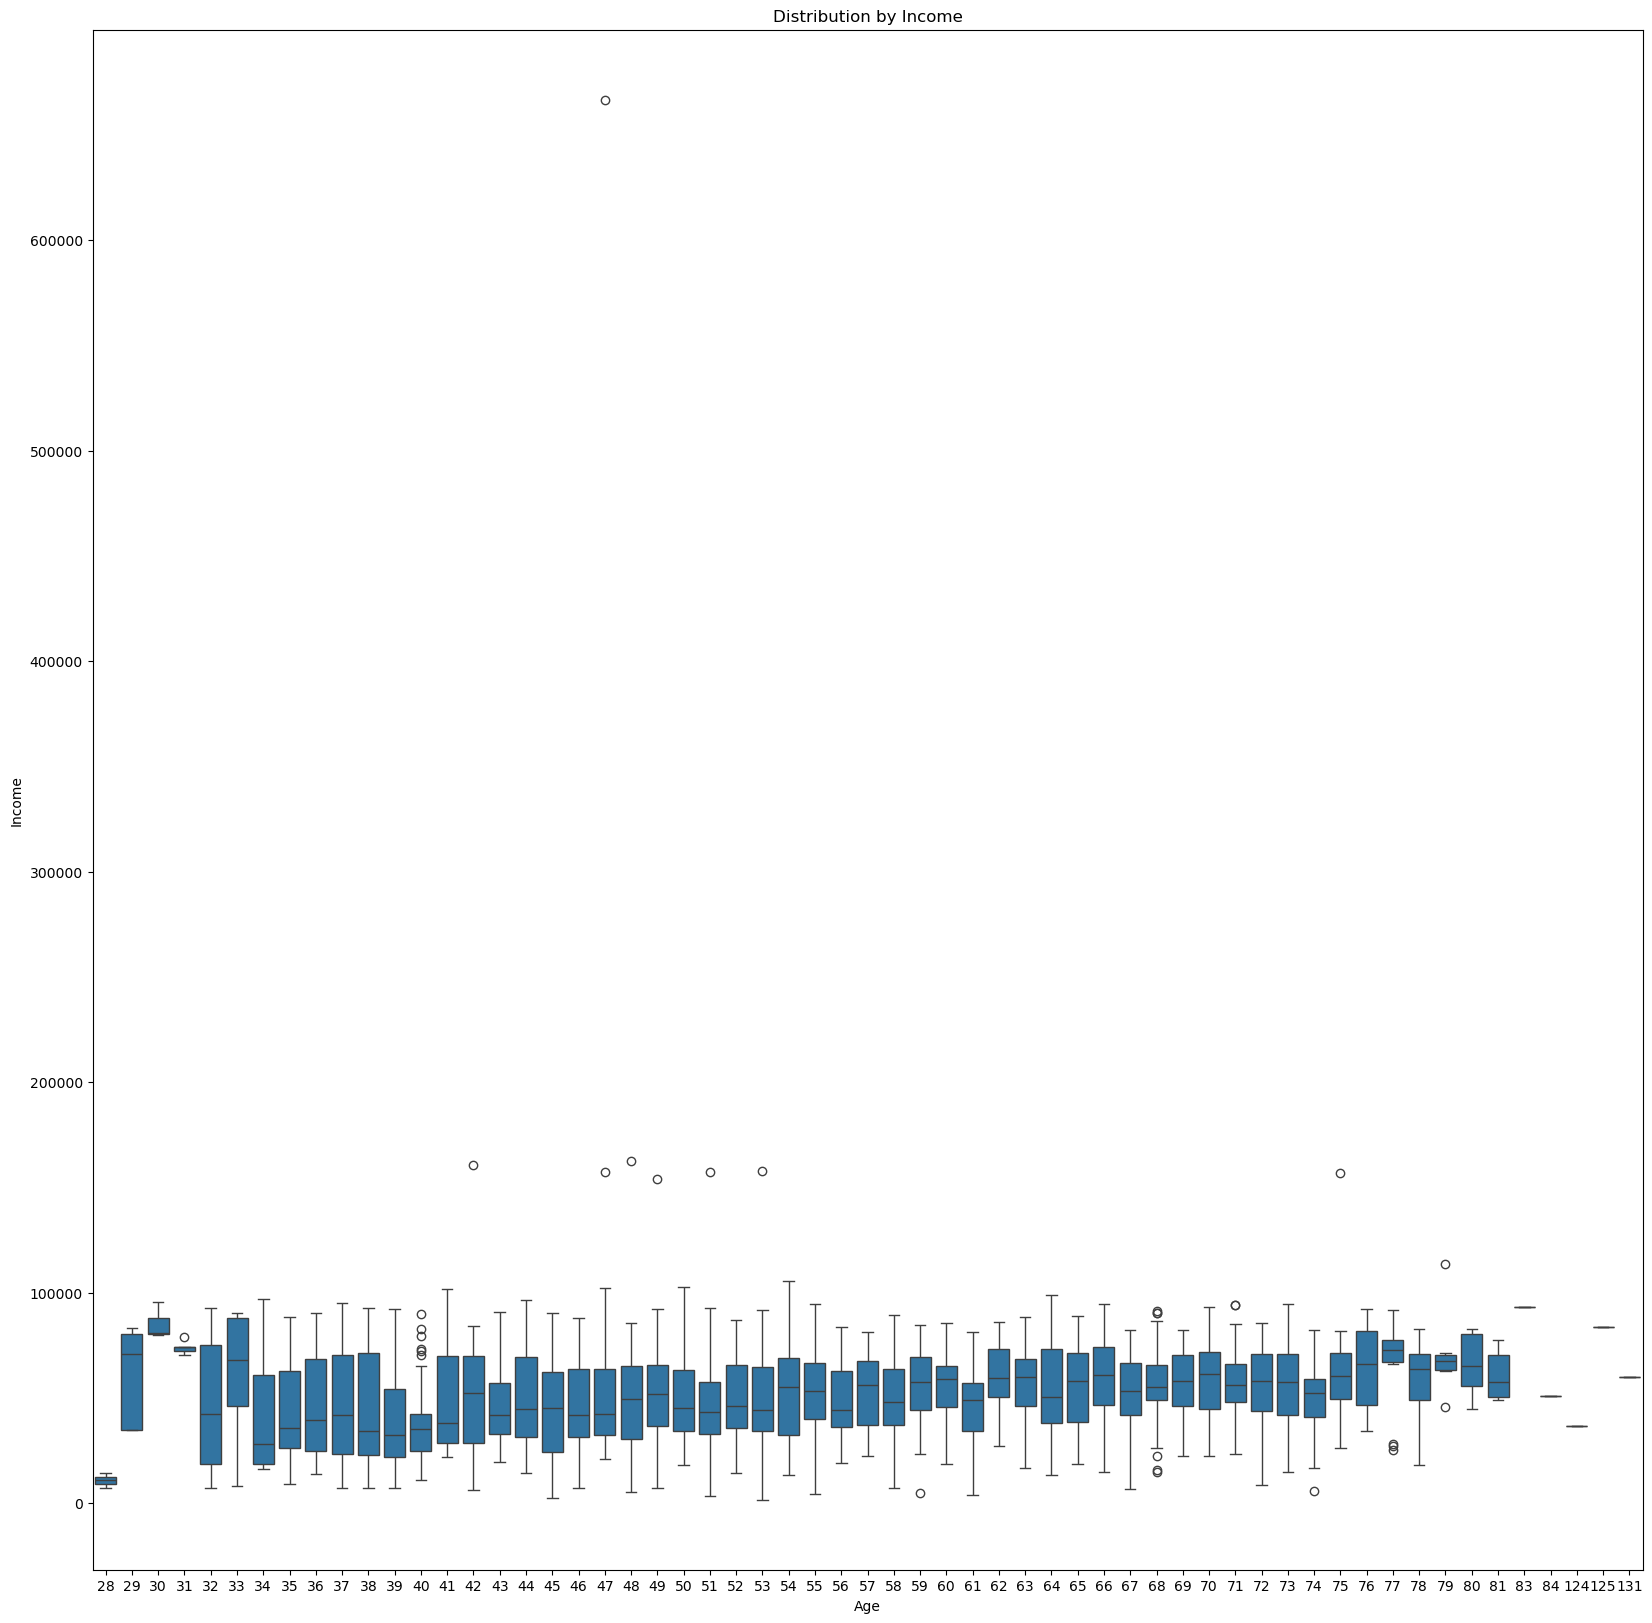

In [26]:
# Boxplot for Age vs Income

plt.figure(figsize=(20,20))
sns.boxplot(x='Age', y='Income', data=df)
plt.title('Distribution by Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [27]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  \
0            0    9/4/2012       58       635  ...             0   
1            1    3/8/2014       38        11  ...             0   
2            0   8/21/2013       26       426  ...             0   
3            0   2/10/2014       26        11  ...             0   
4            0   1/19/2014       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1   6/13/2013       46       709  ...             0   
2236         1   6/10/2014       56       406  ...             0   
2237         0   1/25/2014       91       908  ...             1   
2238         1   1/24/2014        8       428  ...             0   
2239         1  10/15/2012       40        84  ...             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_Revenue  Response  \
0                0             0             0         0         11         1   
1                0             0             0         0         11         0   
2                0             0             0         0         11         0   
3                0             0             0         0         11         0   
4                0             0             0         0         11         0   
...            ...           ...           ...       ...        ...       ...   
2235             0             0             0         0         11         0   
2236             0             1             0         0         11         0   
2237             0             0             0         0         11         0   
2238             0             0             0         0         11         0   
2239             0             0             0         0         11         1   

      Age  Family_Size  Total_Spent  
0      67            1         1617  
1      70            3           27  
2      59            1          776  
3      40            2           53  
4      43            2          422  
...   ...          ...          ...  
2235   57            2         1341  
2236   78            4          444  
2237   43            1         1241  
2238   68            2          843  
2239   70            3          172  

[2240 rows x 31 columns]

In [28]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_Revenue', 'Response', 'Age',
       'Family_Size', 'Total_Spent'],
      dtype='object')

In [29]:
df.drop(['Dt_Customer','Complain','Recency'],axis=1,inplace=True)

In [30]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Z_Revenue', 'Response', 'Age', 'Family_Size', 'Total_Spent'],
      dtype='object')

In [31]:
# Encode categorical variables (Education, Marital_Status)
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])

# Exploratory Data Analysis (EDA)

# Univariate Analysisabs

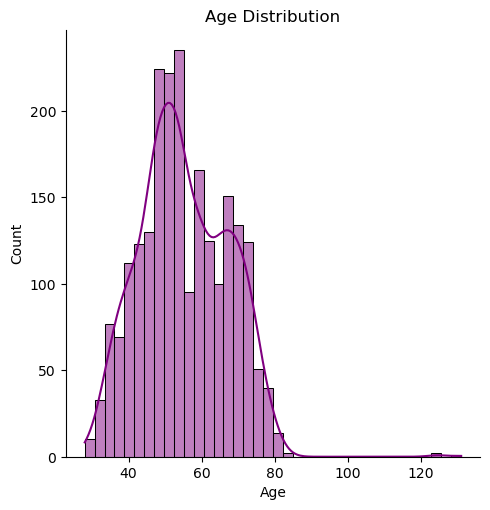

In [32]:
# Plotting Age distribution
sns.displot(df['Age'], kde=True, color='purple')
plt.title('Age Distribution')
plt.show()

<Axes: title={'center': 'How Educationn impacts on Expenses'}, xlabel='Education', ylabel='Total_Spent'>

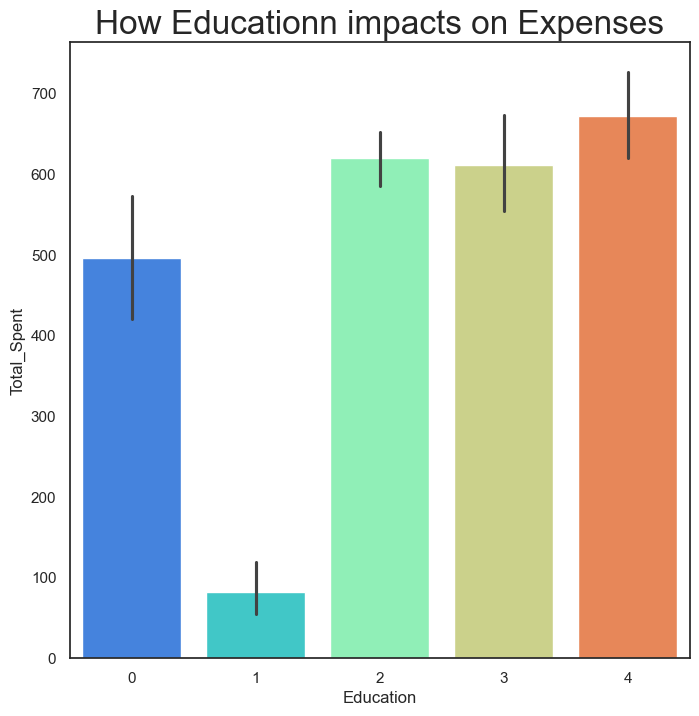

In [33]:
sns.set_theme(style='white')
plt.figure(figsize=(8,8))
plt.title("How Educationn impacts on Expenses",fontsize=24)
sns.barplot(x='Education', y='Total_Spent', data=df,palette='rainbow')

<Axes: title={'center': 'How MaritalStatus impacts on Expenses'}, xlabel='Marital_Status', ylabel='Total_Spent'>

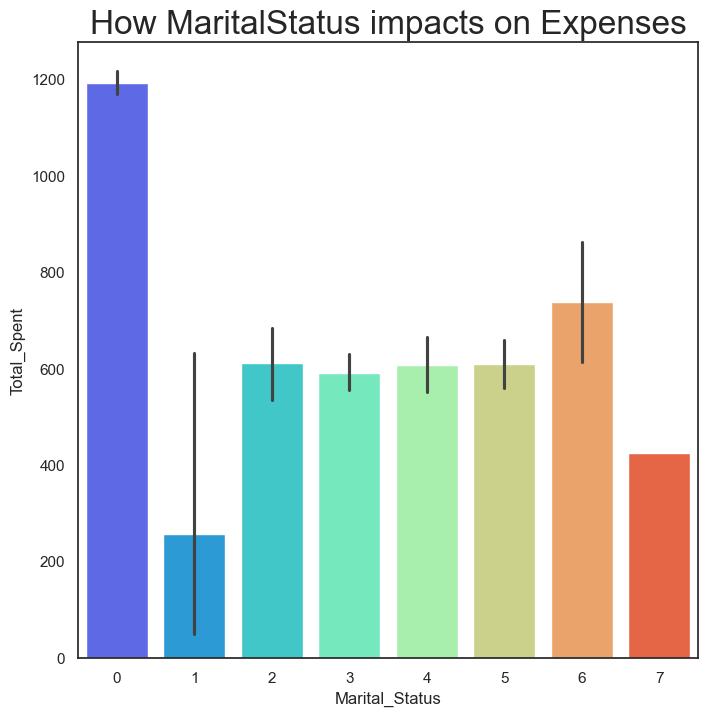

In [34]:
sns.set_theme(style='white')
plt.figure(figsize=(8,8))
plt.title("How MaritalStatus impacts on Expenses",fontsize=24)
sns.barplot(x='Marital_Status', y='Total_Spent', data=df,palette='rainbow')

<Axes: title={'center': 'How FamilySize impacts on Expenses'}, xlabel='Family_Size', ylabel='Total_Spent'>

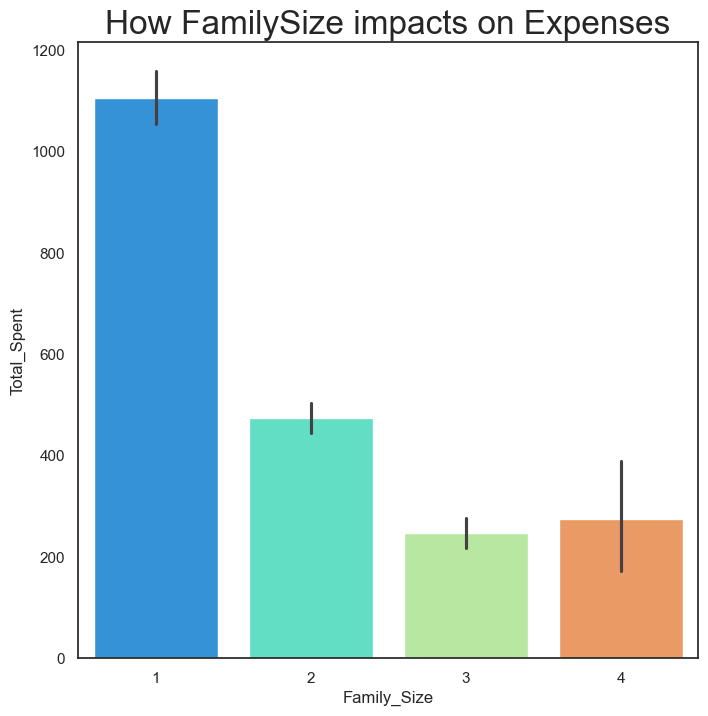

In [35]:
sns.set_theme(style='white')
plt.figure(figsize=(8,8))
plt.title("How FamilySize impacts on Expenses",fontsize=24)
sns.barplot(x='Family_Size', y='Total_Spent', data=df,palette='rainbow')

<Axes: title={'center': 'How Age impacts on Expenses'}, xlabel='Age', ylabel='Total_Spent'>

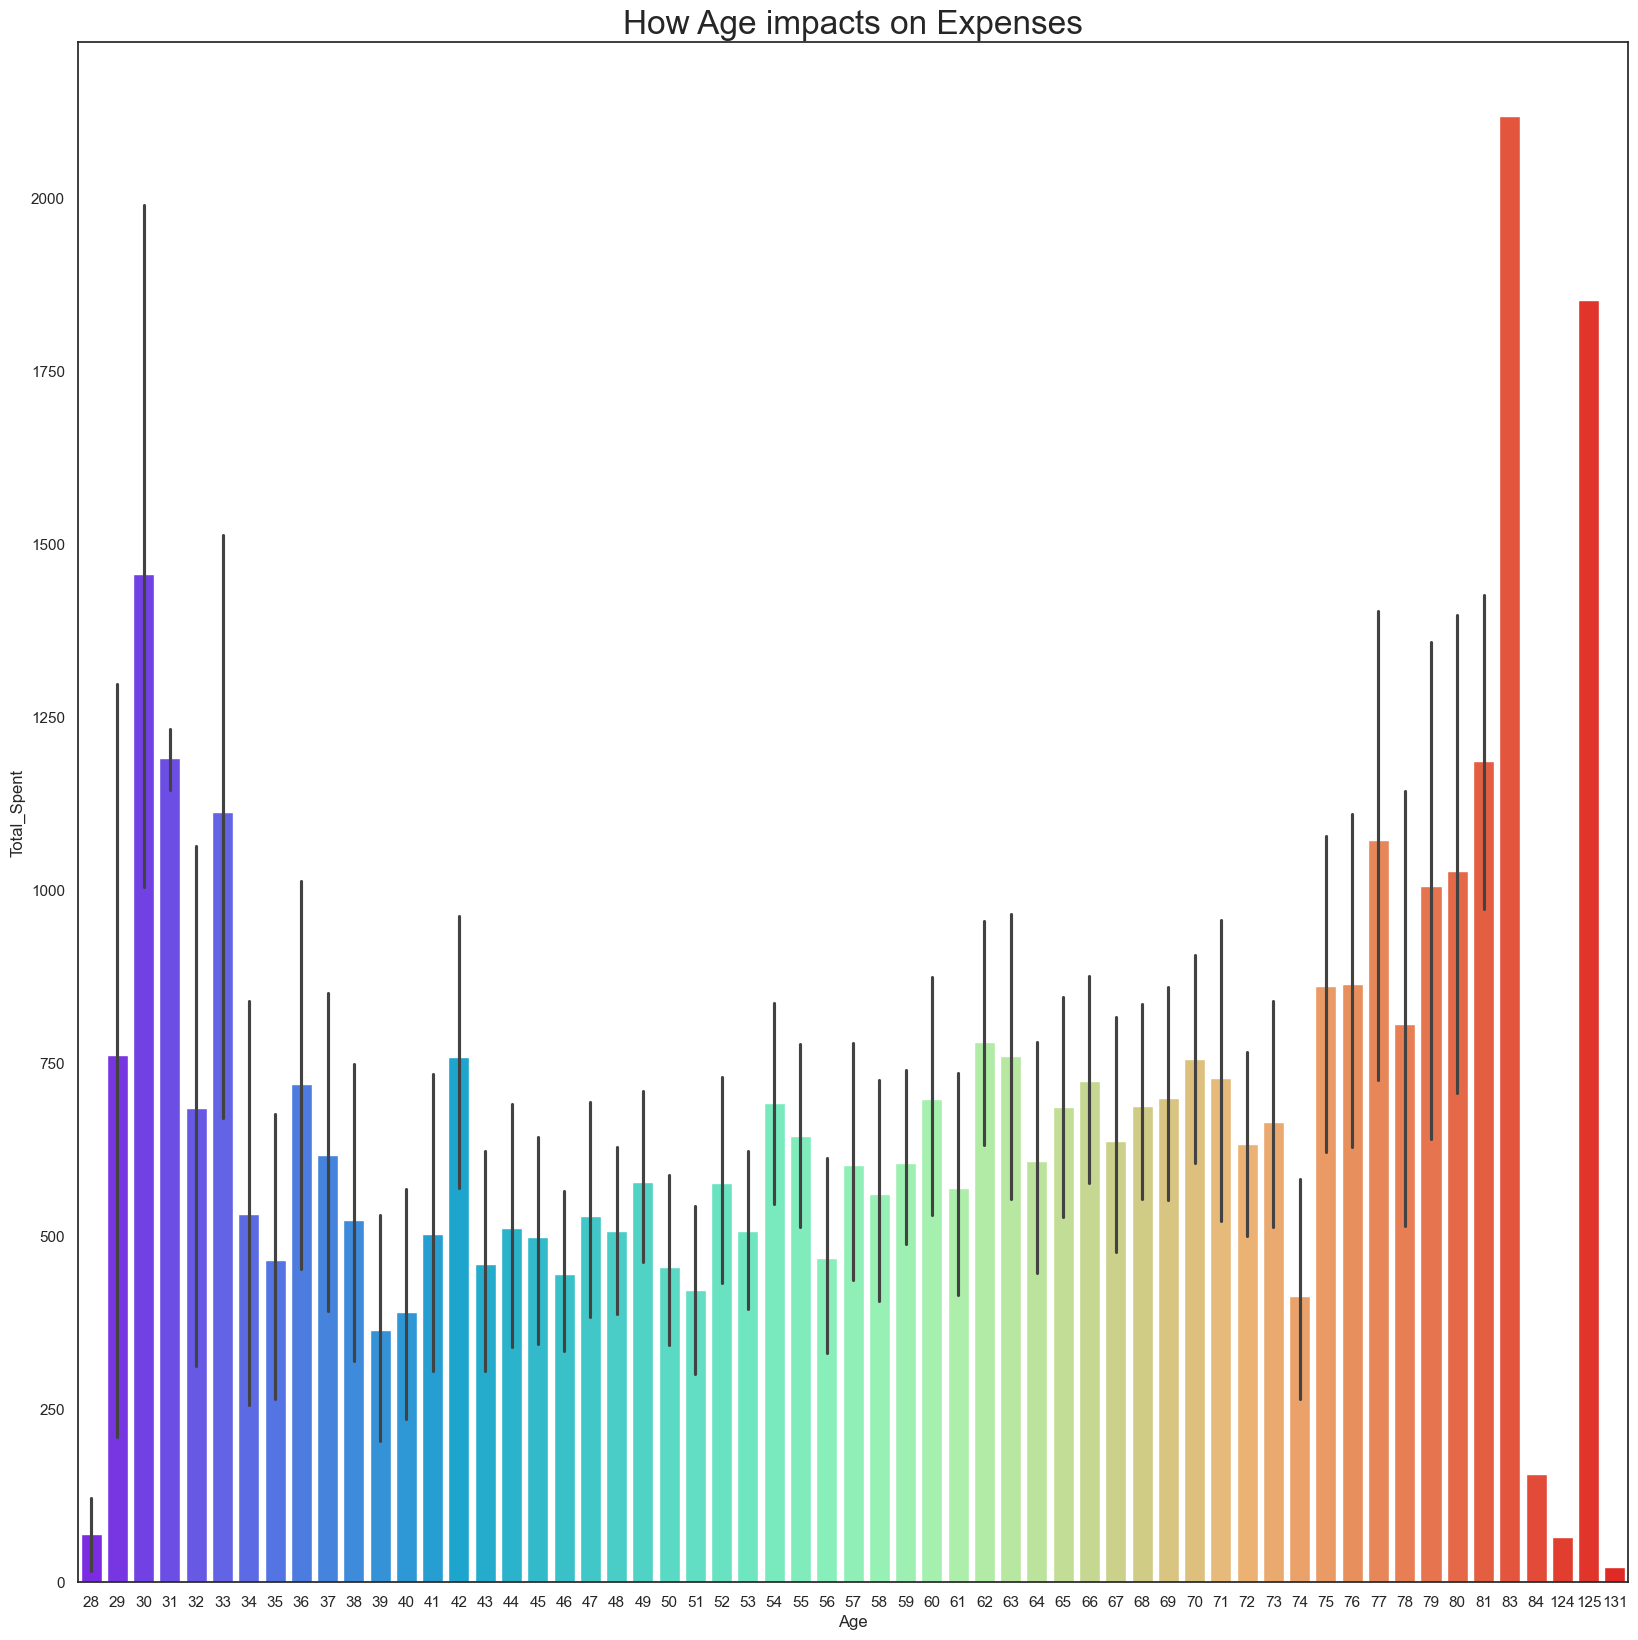

In [36]:
sns.set_theme(style='white')
plt.figure(figsize=(20,20))
plt.title("How Age impacts on Expenses",fontsize=24)
sns.barplot(x='Age', y='Total_Spent', data=df,palette='rainbow')

In [37]:
df=df[df['Age']<90]
df=df[df['Income']<300000]

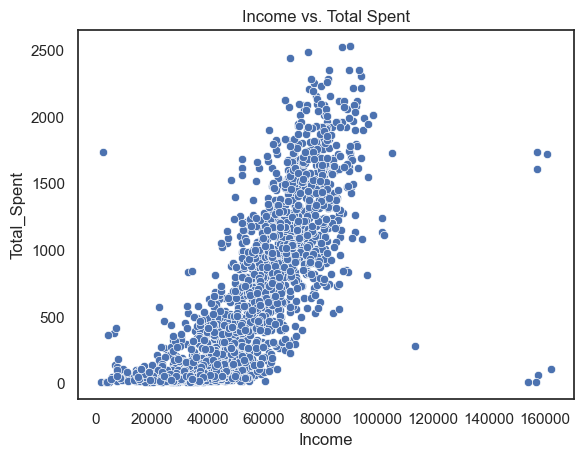

In [38]:
# Relationship between Income and Total_Spent
sns.scatterplot(x='Income', y='Total_Spent', data=df)
plt.title('Income vs. Total Spent')
plt.show()

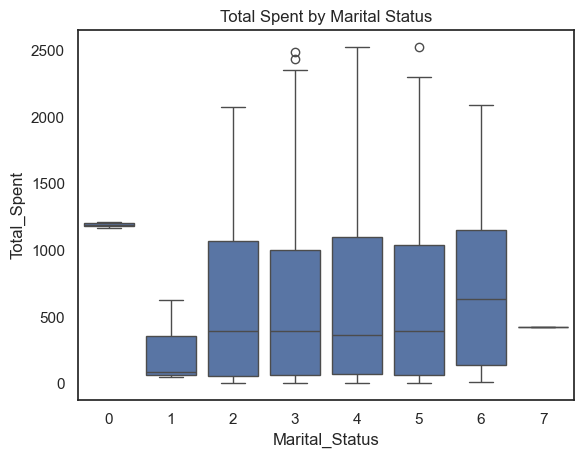

In [39]:
# Analyzing Total_Spent by Marital_Status
sns.boxplot(x='Marital_Status', y='Total_Spent', data=df)
plt.title('Total Spent by Marital Status')
plt.show()

In [40]:
# Encode categorical variables (Education, Marital_Status)
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])

In [41]:
df = df.drop(columns=['Year_Birth','ID', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'],axis=1)


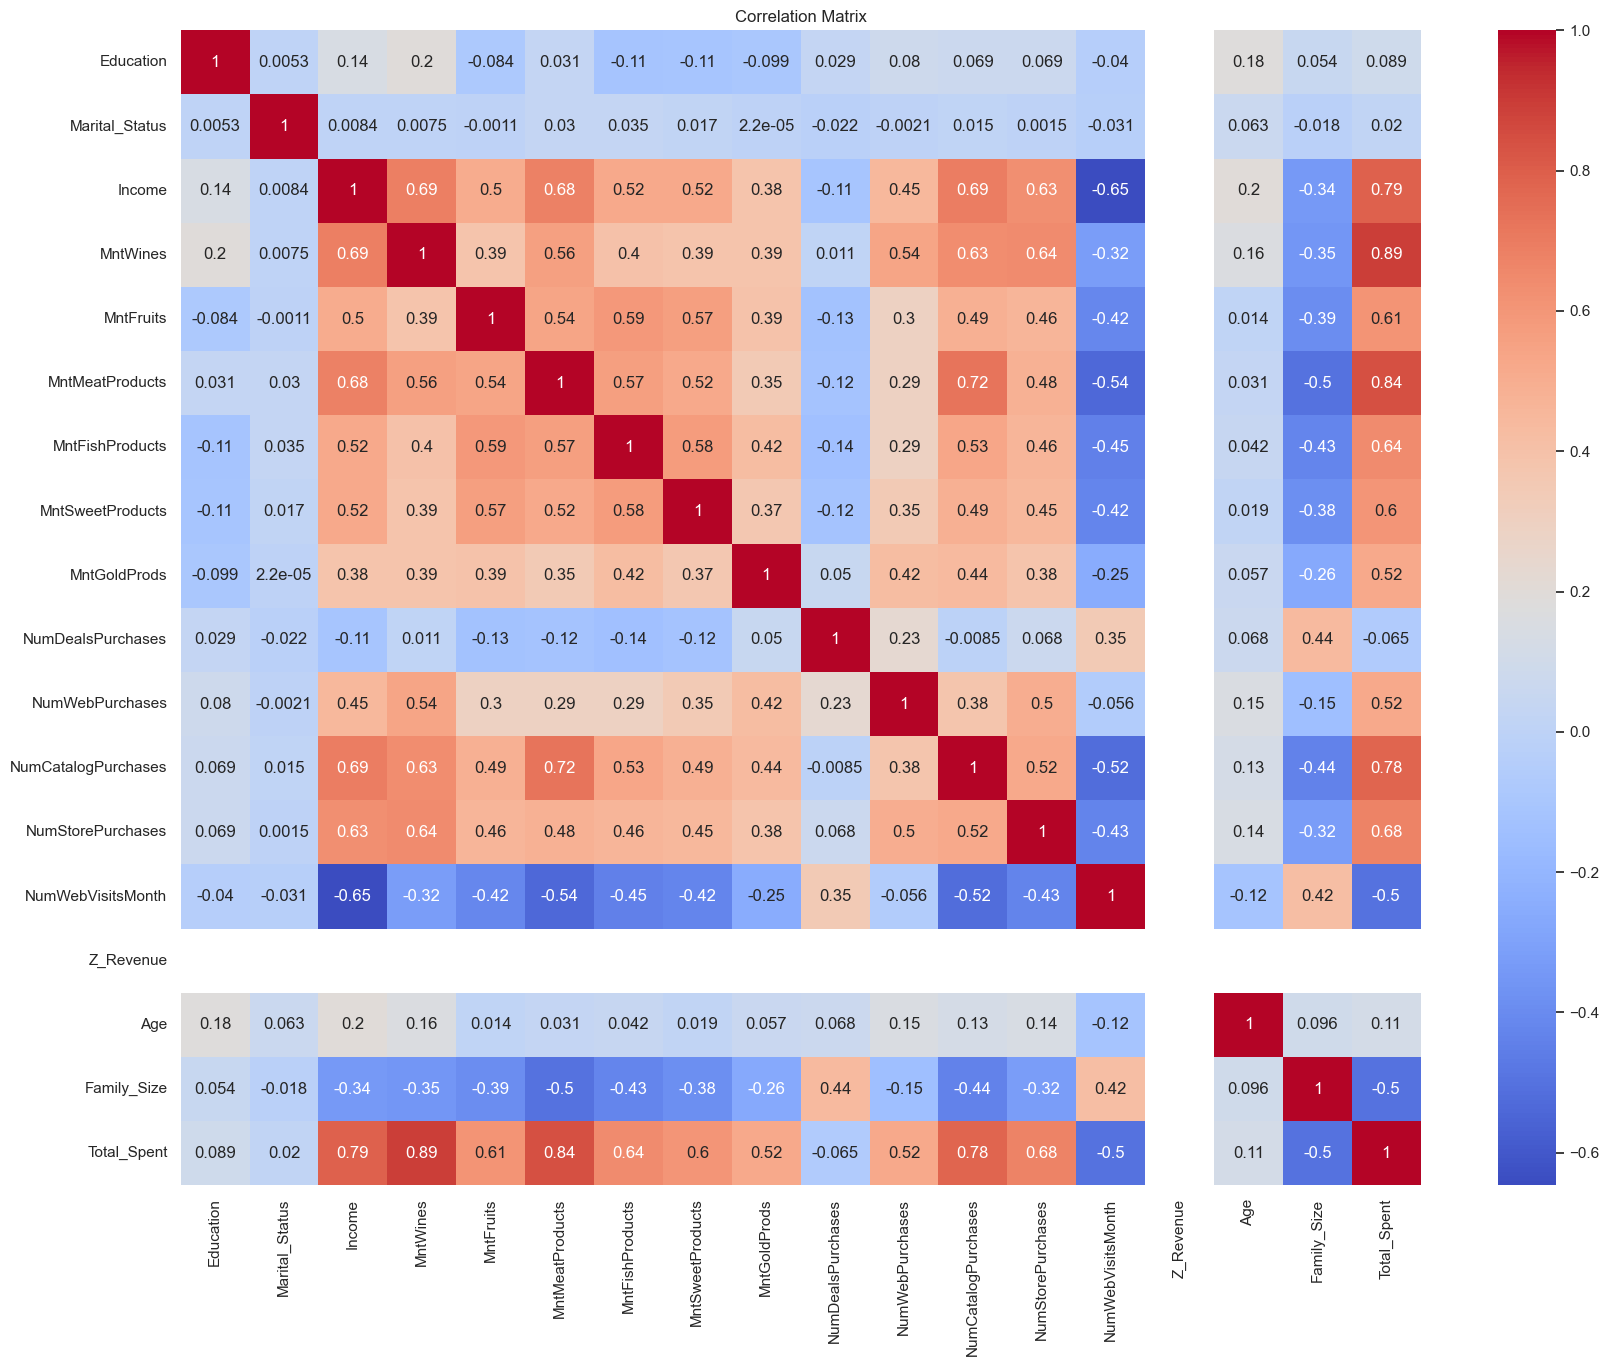

In [42]:
# Correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [43]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Z_Revenue', 'Age', 'Family_Size', 'Total_Spent'],
      dtype='object')

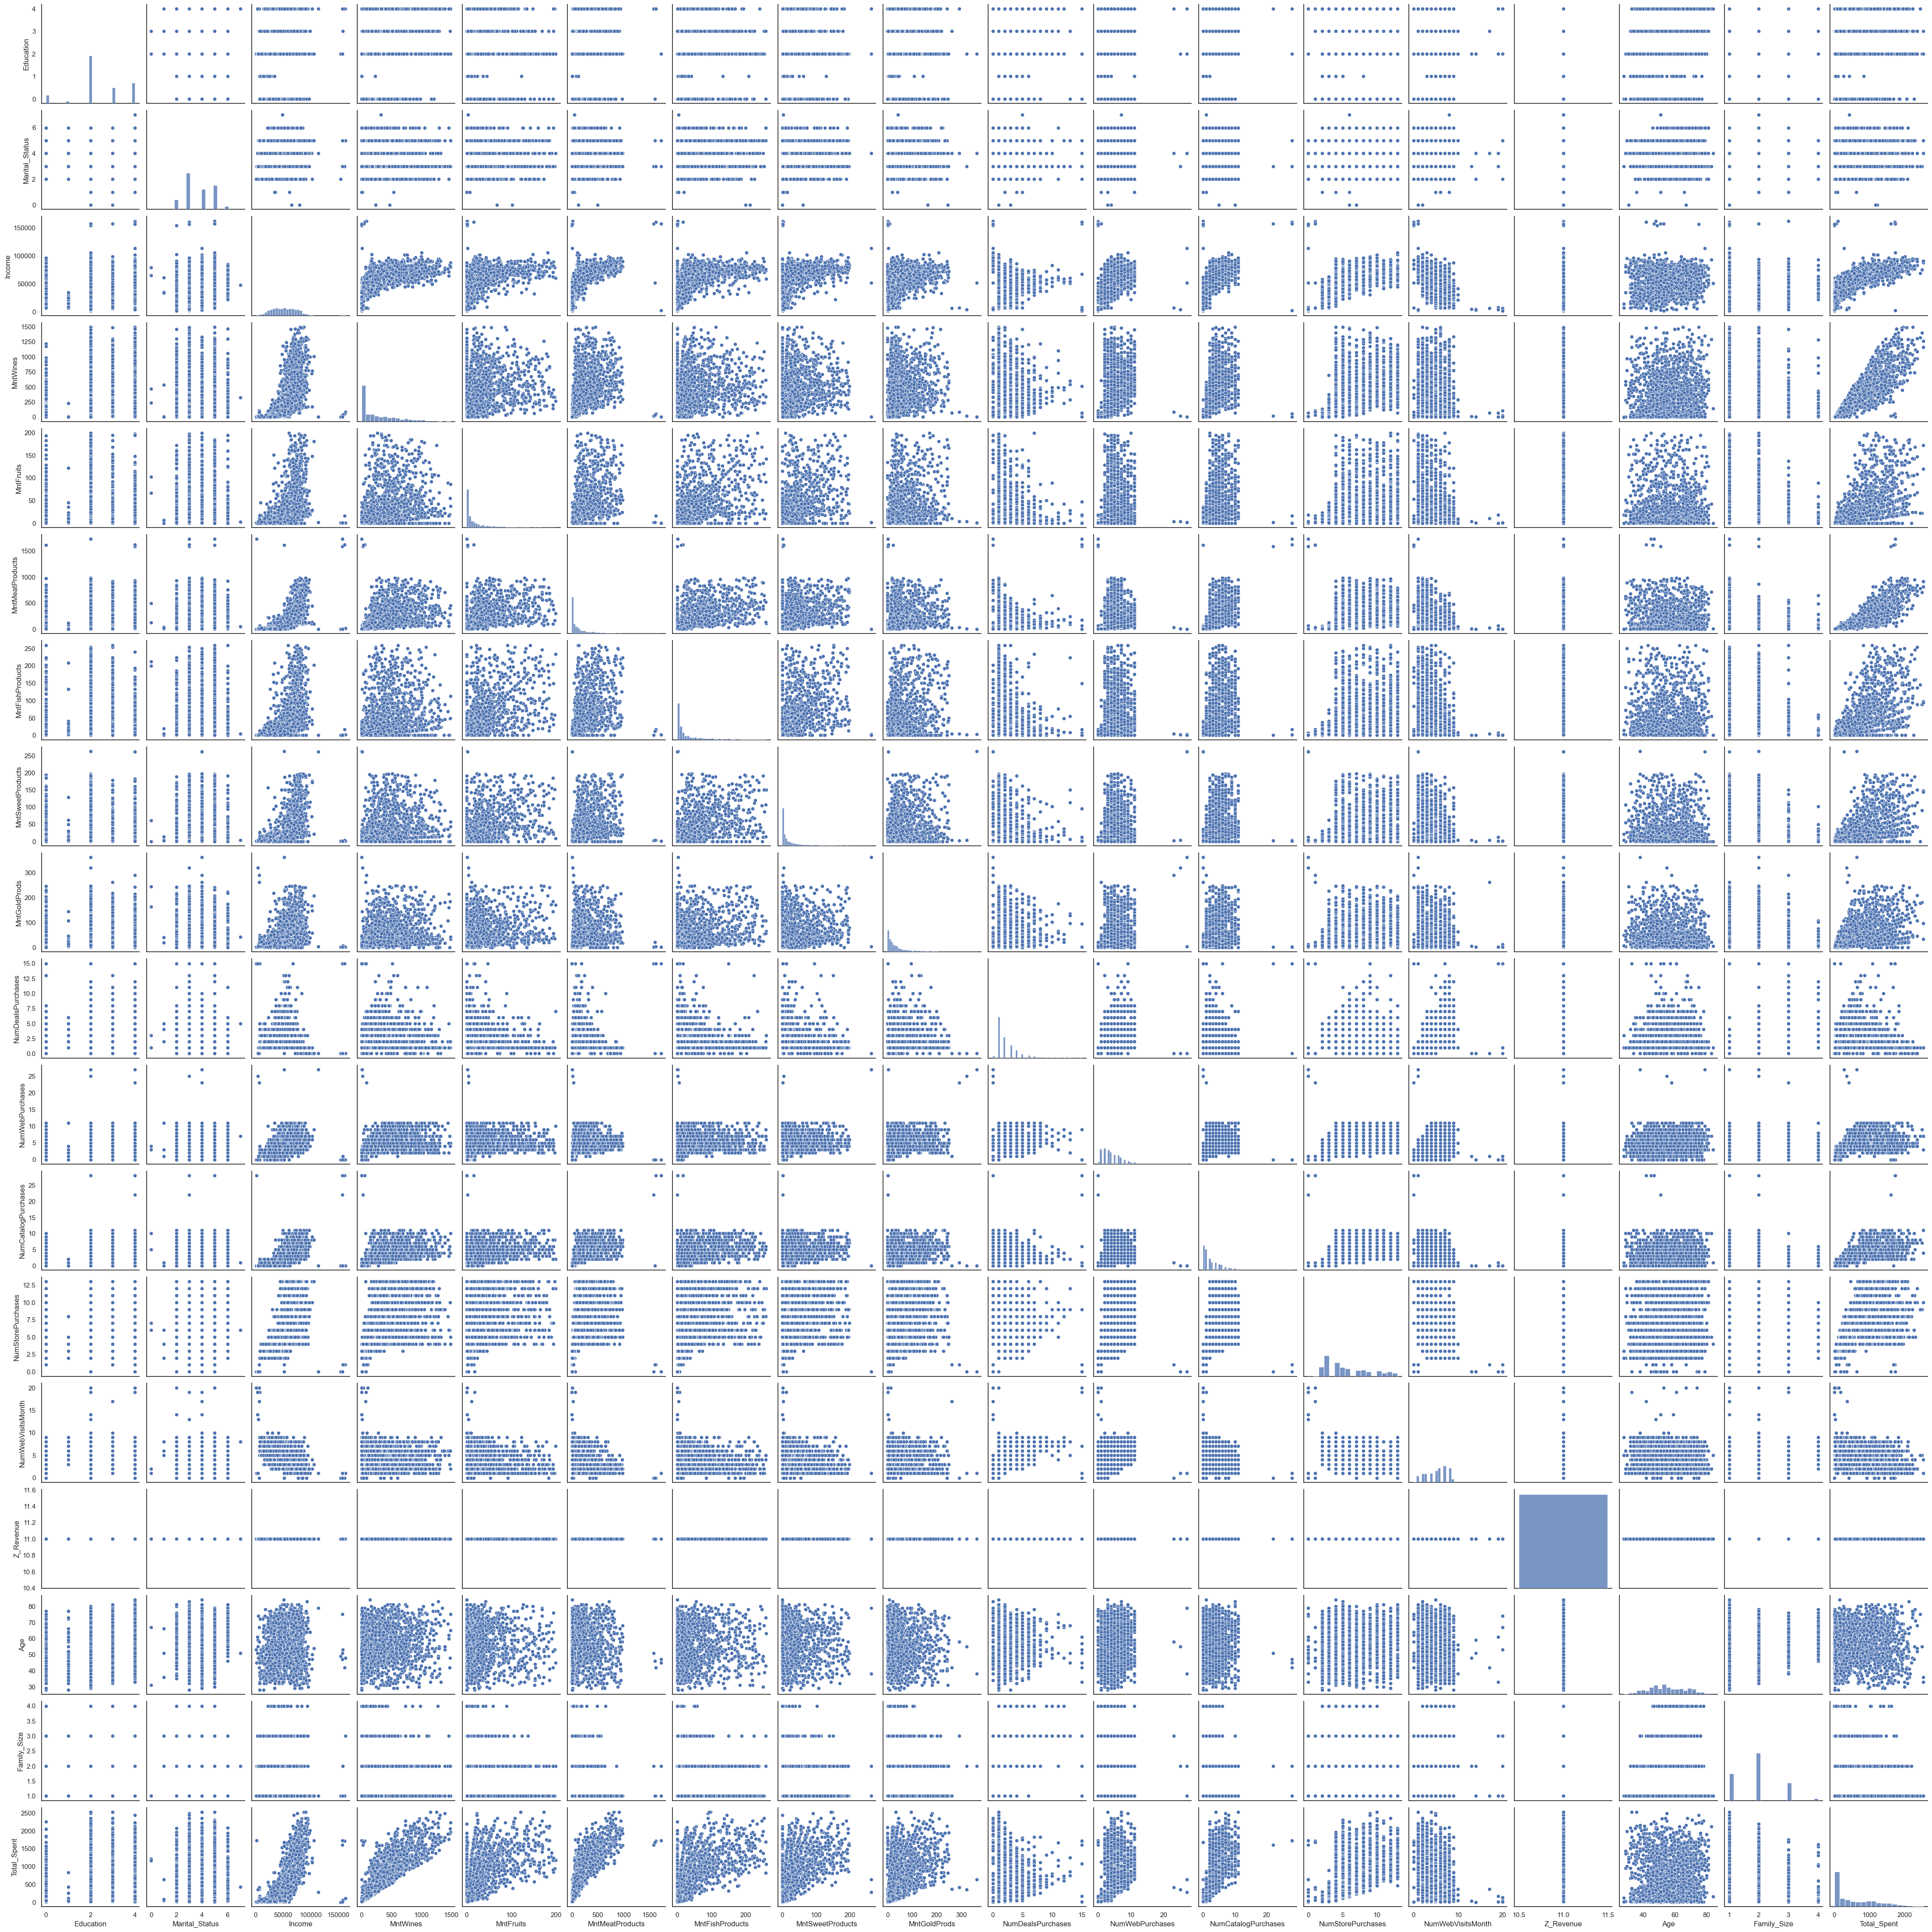

In [44]:
sns.pairplot(df, height=2.5)

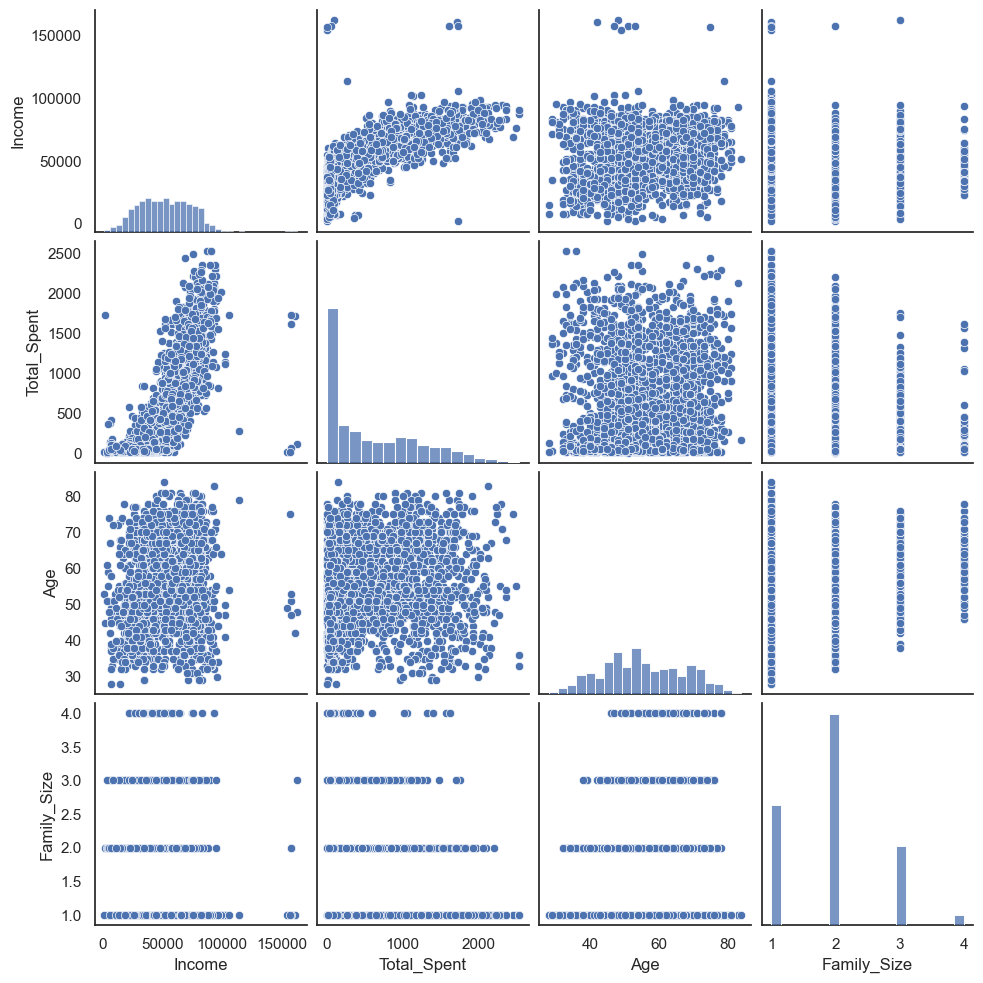

In [45]:
sns.pairplot(df[['Income', 'Total_Spent', 'Age', 'Family_Size']])
plt.show()

# Clustering Analysis

# Determine Optimal Number of Clusters

In [46]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Z_Revenue', 'Age', 'Family_Size', 'Total_Spent'],
      dtype='object')

In [47]:
# Ensure the dataframe `df` only contains numerical columns for clustering
numerical_columns = ['Education', 'Marital_Status', 'Income', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Z_Revenue', 'Age', 'Family_Size', 'Total_Spent']

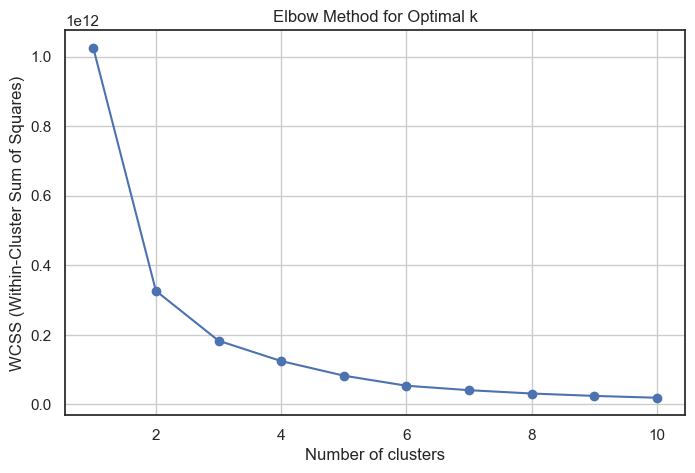

In [48]:
# Filter to include only numerical columns (excluding any datetime or categorical columns)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df_numerical = df[numerical_columns]
# Check if there are any missing values in the numerical data
df_numerical = df_numerical.dropna()

# Elbow method for finding the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_numerical)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Applying K-Means Clustering

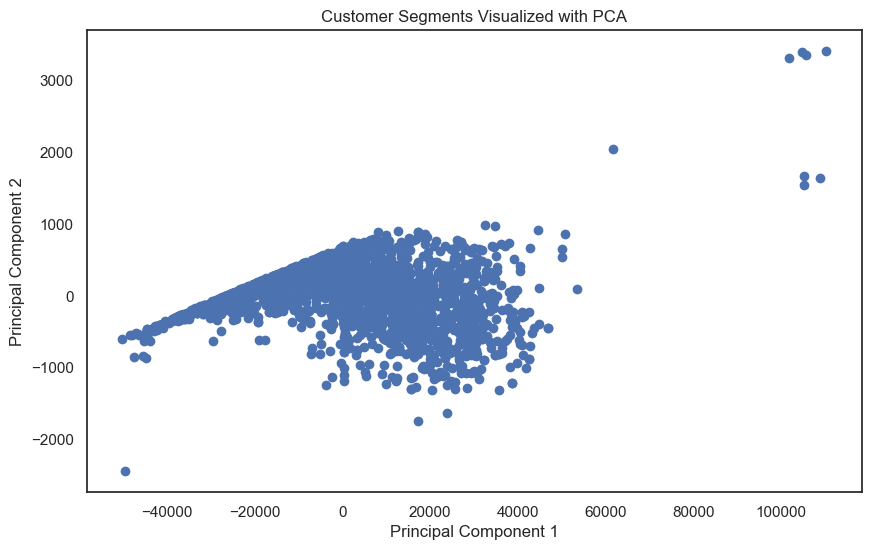

In [49]:
from sklearn.decomposition import PCA
# Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_numerical)


# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualize the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('Customer Segments Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [50]:
# Choose optimal k (e.g., 3) and fit K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
Clusters_KMeans = kmeans.fit_predict(pca_df)
# Add the cluster labels to the original data
df['Cluster_KMeans'] = Clusters_KMeans

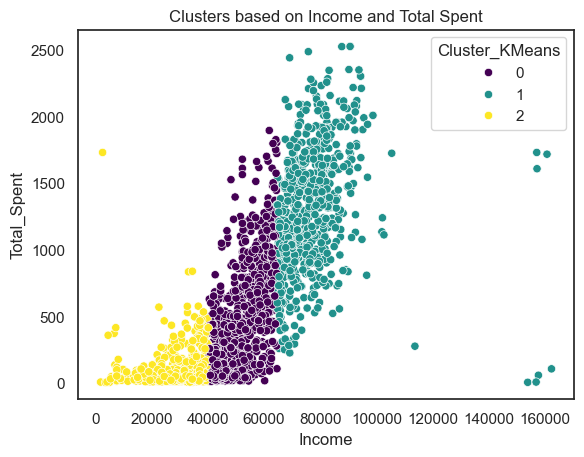

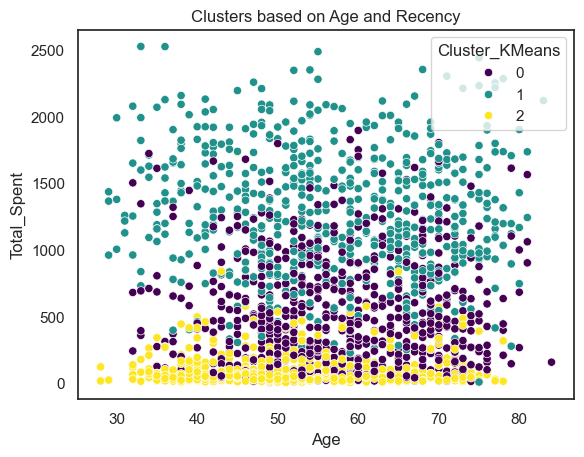

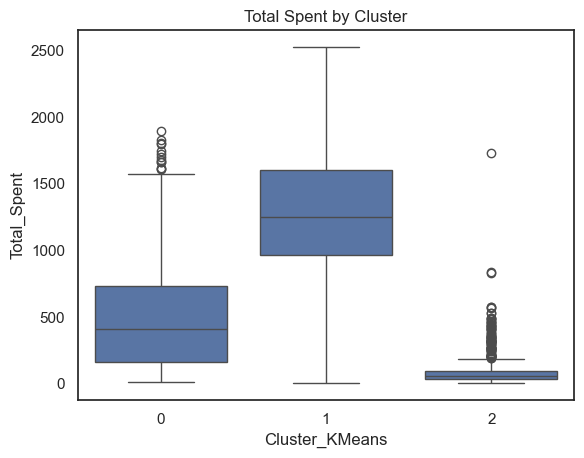

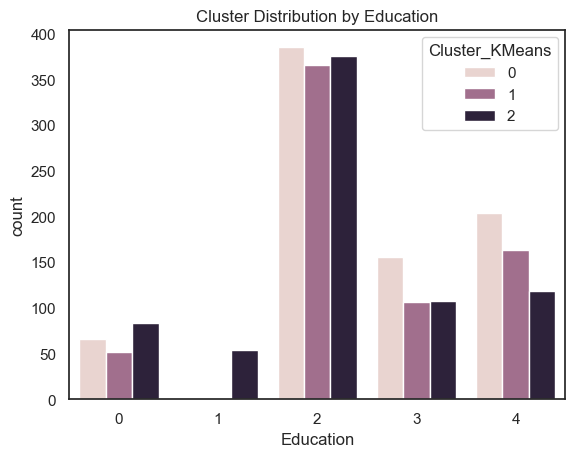

In [51]:
# Visualize clusters based on key features
sns.scatterplot(x='Income', y='Total_Spent', hue='Cluster_KMeans', data=df, palette='viridis')
plt.title('Clusters based on Income and Total Spent')
plt.show()

sns.scatterplot(x='Age', y='Total_Spent', hue='Cluster_KMeans', data=df, palette='viridis')
plt.title('Clusters based on Age and Recency')
plt.show()

# Cluster profiles based on spending
sns.boxplot(x='Cluster_KMeans', y='Total_Spent', data=df)
plt.title('Total Spent by Cluster')
plt.show()

# Distribution of clusters by Education
sns.countplot(x='Education',hue='Cluster_KMeans', data=df)
plt.title('Cluster Distribution by Education')
plt.show()

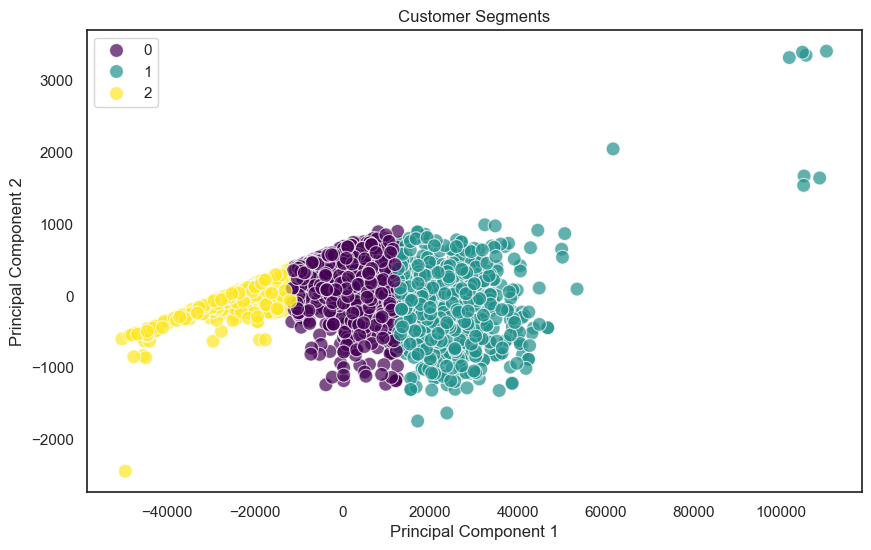

In [52]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=Clusters_KMeans, palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [53]:
# Calculate silhouette score
kmeans_silhouette = silhouette_score(pca_df, Clusters_KMeans)
print(f'K-Means Silhouette Score: {kmeans_silhouette}')

K-Means Silhouette Score: 0.5440803986382055


# Save the Model

In [55]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df) 

import pickle

# Save the model and the scaler
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)